# Dataset object

In [1]:
import numpy as np
from datasets import Dataset, Axis

In [2]:
ds1 = Dataset(
    name='qpc',
    unit='nA',
    value=np.arange(100).reshape(50,2))
ds1

name: qpc - unit: nA - shape: (50, 2)
axes: 2 elements
	[0] name: counter_dim0 - unit: a.u. - shape: (50,) - dim: 0
	[1] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1

## Add axis to dataset

In [3]:
ax1 = Axis(
    name='G1',
    unit='V',
    value=np.arange(50),
    dim=0, # sweeping dimension index
)
ds1.add_axis(ax1)
ds1

name: qpc - unit: nA - shape: (50, 2)
axes: 3 elements
	[0] name: G1 - unit: V - shape: (50,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (50,) - dim: 0
	[2] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1

In [4]:
ax2 = Axis(
    name='G2',
    unit='V',
    value=np.arange(78), # note that this does not match with ds1.shape (50,2)
    dim=0,
)
ds1.add_axis(ax2) # it will ignore it because it is not a valid axis for this dataset
ds1

name: qpc - unit: nA - shape: (50, 2)
axes: 3 elements
	[0] name: G1 - unit: V - shape: (50,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (50,) - dim: 0
	[2] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1

In [5]:
ds1.label

'qpc (nA)'

# Use plotter
You need the following packages:
- ipywidgets: pip install ipywidgets (https://ipywidgets.readthedocs.io/en/latest/user_install.html)
- ipympl: pip install ipympl (https://github.com/matplotlib/ipympl)

In [7]:
from figures import Plot1D, Plot2D
import matplotlib.pyplot as plt
%matplotlib widget
save_options = {
    'folder': '',
    'extension': 'png',
    'kwargs': {'dpi': 100, 'bbox_inches': 'tight'},
}
value = np.sin(2*np.pi*ax2.value)
ds2 = Dataset(
    name='sinus',
    value=value)
ax2 = Axis(
    name='x',
    value=np.linspace(-10, 10, 1001),
    dim=0)
ds2.add_axis(ax2)
ds2

name: sinus - unit: a.u. - shape: (78,)
axes: 1 elements
	[0] name: counter_dim0 - unit: a.u. - shape: (78,) - dim: 0

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
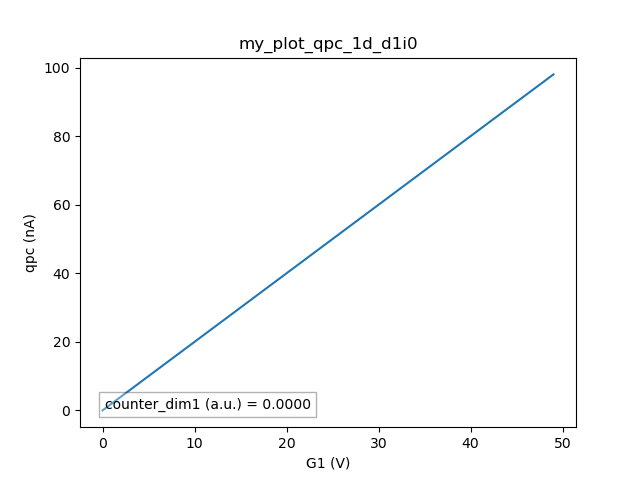

In [8]:
p1 = Plot1D([ds1,ds2], save_options=save_options, title_prefix='my_plot')

In [9]:
p1.ax.plot([1,2,3],'o')

# Datafile

In [10]:
from datafile import Datafile, load_datafile, load_datasets, save_datasets
import os

df = Datafile()
df.add_dataset(ds1)
df.add_dataset(ds2)
df.save(
    fullpath=os.path.join('test_folder','test_df.json'),
    overwrite=True)

In [11]:
df

Datafile
fullpath: test_folder\test_df.json
datasets: 2 elements
[0] name: qpc - unit: nA - shape: (50, 2)
	axes: 3 elements
	[0] name: G1 - unit: V - shape: (50,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (50,) - dim: 0
	[2] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1
[1] name: sinus - unit: a.u. - shape: (78,)
	axes: 1 elements
	[0] name: counter_dim0 - unit: a.u. - shape: (78,) - dim: 0

In [12]:
df2 = load_datafile(os.path.join('test_folder','test_df.json'))
df2

Datafile
fullpath: test_folder\test_df.json
datasets: 2 elements
[0] name: qpc - unit: nA - shape: (50, 2)
	axes: 3 elements
	[0] name: G1 - unit: V - shape: (50,) - dim: 0
	[1] name: counter_dim0 - unit: a.u. - shape: (50,) - dim: 0
	[2] name: counter_dim1 - unit: a.u. - shape: (2,) - dim: 1
[1] name: sinus - unit: a.u. - shape: (78,)
	axes: 1 elements
	[0] name: counter_dim0 - unit: a.u. - shape: (78,) - dim: 0

## Some relevant attributes / features

In [25]:
print(df2.fullpath)
print(df2.filename)
print(df2.folder)
print(df2.ds_names)
ds1 = df2['qpc']
ds2 = df2['sinus']
ds3 = df2.get_dataset('qpc')
list_ds = df2.get_datasets_by_name('sin',exact_match=False) # always return a list



test_folder\test_df.json
test_df
test_folder
['qpc', 'sinus']


In [60]:
dir(df2)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__next__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'add_dataset',
 'add_datasets',
 'clear_datasets',
 'datasets',
 'ds_names',
 'filename',
 'folder',
 'fullpath',
 'get_dataset',
 'get_datasets_by_name',
 'get_json_path',
 'get_npz_path',
 'load',
 'load_json',
 'load_npz',
 'remove_dataset',
 'remove_datasets_by_name',
 'save',
 'save_json',
 'save_npz',
 'set_fullpath']